In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [7]:
df = pd.read_excel("Superstore.xlsx", index_col="Row ID")

In [8]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.shape

(9994, 20)

In [10]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

In [12]:
df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Product ID'], axis=1 )

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,
1,2013-11-09,2013-11-12,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,2013-11-09,2013-11-12,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,2013-06-13,2013-06-17,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,2012-10-11,2012-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,2012-10-11,2012-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,2011-01-22,2011-01-24,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9991,2014-02-27,2014-03-04,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,2014-02-27,2014-03-04,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
Sales_by_day_df = df.groupby('Order Date')['Sales'].sum().reset_index()

In [16]:
Sales_by_day_df.drop(columns=['Order Date'], inplace=True)

In [17]:
Sales_by_day_df.head(10)

,Sales
0,16.448
1,288.060
2,19.536
3,4407.100
4,87.158
5,40.544
6,54.830
7,9.940
8,3553.795
9,61.960


In [18]:
Sales_by_day_df.tail(10)

,Sales
1228,2140.9400
1229,7442.0210
1230,1926.7760
1231,6233.0540
1232,2698.9270
1233,814.5940
1234,177.6360
1235,1657.3508
1236,2915.5340
1237,713.7900


In [19]:
split_type = [[0.8,0.2], [0.9, 0.1], [0,75,0.25]]

In [20]:
split = 0

In [21]:
#Defining the split size
train_size = int(split_type[split][0] * len(Sales_by_day_df))
test_size = int(split_type[split][1] * len(Sales_by_day_df))

In [22]:
train_data = Sales_by_day_df[:train_size].values
test_data = Sales_by_day_df[train_size:train_size+test_size].values

In [23]:
# Function to create dataset input and output, it will convert an array of values into a dataset matrix, use the sliding window with the time_step argument
def create_dataset(data, window_slide):
    X, y = [], []

    for i in range(len(data) - window_slide - 1):
        X.append(data[i : (i + window_slide), 0])
        y.append(data[i + window_slide, 0])

    return np.array(X), np.array(y)

In [24]:
WINDOW_SLIDE = 7

# Create X, y for train, test and validate
X_train, y_train = create_dataset(train_data, WINDOW_SLIDE)
X_test, y_test = create_dataset(test_data, WINDOW_SLIDE)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((982, 7), (982,), (239, 7), (239,))

In [25]:
params = {
  'objective': 'reg:squarederror',
  'max_depth': 5,
  'eta': 0.04,
  'n_estimators': 400,
  'subsample' : 0.9,
  'min_child_weight': 5,
  'tree_method': 'approx',
  'eval_metric' : mean_squared_error,
  'gamma': 0.1,
}

In [26]:
model = xgb.XGBRegressor(**params)

In [27]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.04,
             eval_metric=<function mean_squared_error at 0x0000020DE5F1F560>,
             feature_types=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_pred = model.predict(X_test)

In [29]:
def forecast(data, window_slide, forecast_days):
    # Get the last sequence_length days
    x_forecast = data[-window_slide:]
    y_forecast = []

    for i in range(forecast_days + 1):
        # Reshape x_forecast to have the shape (1, window_side, num_features)
        x_forecast_reshaped = x_forecast.reshape(1, window_slide)
        # Predict the next day
        y = model.predict(x_forecast_reshaped)
        y_forecast.append(y[0])

        # Add the new prediction to the data
        x_forecast = np.insert(x_forecast, -1, y, axis=0)[1:]

    return y_forecast

In [30]:
y_pred_30_days = forecast(test_data, WINDOW_SLIDE, 30)

In [31]:
# Splitting data into train, test and validation set again to evaluate, because i shaped the data between 0 and 1 to suit the model
train_data1 = Sales_by_day_df[:train_size]
test_data1 = Sales_by_day_df[train_size : train_size + test_size]

X_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1.index).reshape(-1,1)

In [32]:
def draw_plot(y_days_predict, days):
    plt.figure(figsize=(10, 6))
    plt.ylabel("Sales")

    # Raw data
    plt.plot(train_data1.index, train_data1, label="Train")
    plt.plot(test_data1.index, test_data1, label="Test")
    # Predict test and validate
    plt.plot(
        test_data1.index[
            WINDOW_SLIDE : len(y_pred) + WINDOW_SLIDE
        ],  # because using the sliding window (WINDOW_SIDE) -> the index of 2 dataset is difference
        y_pred,
        label="Predicted Test",
        linestyle="--",
    )

    # Predict the next 30/60/90 days
    plt.plot(
        test_data1.index[-1] + np.arange(1, len(y_days_predict) + 1),
        y_days_predict,
        label=f"Predicted Next {days} Days",
        linestyle="--",
    )
    plt.legend()
    plt.show()

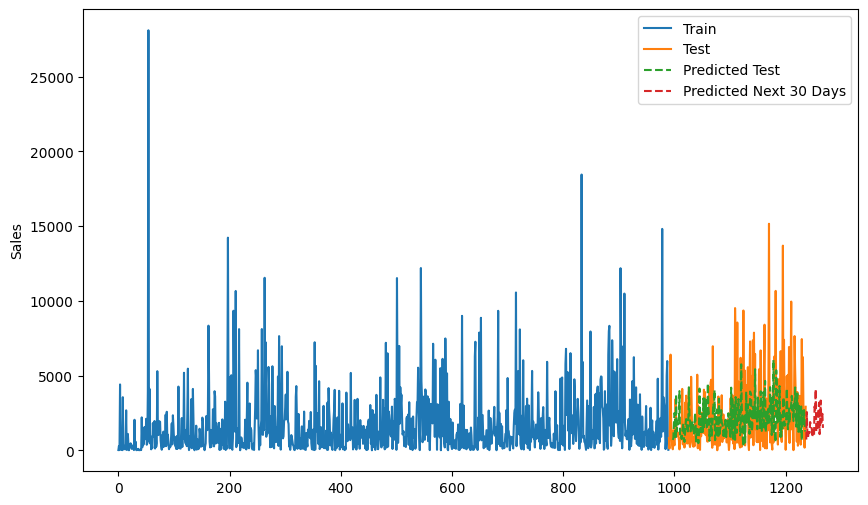

In [33]:
draw_plot(y_pred_30_days, 30)


In [34]:
y_pred

array([ 693.89294,  811.6272 , 1757.7467 , 2494.537  , 2368.1555 ,
        732.0006 , 3739.4075 , 1253.9954 , 1979.1213 , 1723.0344 ,
       1762.6938 , 1806.2141 , 3963.6028 ,  934.54596, 1020.46094,
        997.0266 ,  748.2854 , 1265.967  , 1504.498  , 1803.8331 ,
        784.664  ,  559.5868 , 1131.7607 , 1686.1384 , 2088.5706 ,
       1550.2687 , 1617.316  , 1172.2822 , 2017.1698 , 4216.5254 ,
       2198.6057 , 1957.3213 , 1268.2689 , 1647.8276 , 1378.5048 ,
       1935.9517 , 1941.0195 , 1346.4523 , 1046.3982 , 1561.3462 ,
       2494.5493 , 1825.7443 ,  587.62756, 1584.0012 , 1269.3285 ,
       1048.1288 ,  479.67136, 1038.2047 , 4130.3105 , 2558.62   ,
       1222.8479 , 2020.1965 , 1212.2307 , 2439.6807 , 1105.8417 ,
       3468.8455 , 1406.882  , 3465.5298 , 1754.7426 , 2736.3394 ,
       3356.0027 , 1552.7716 , 1430.8906 , 4474.503  , 2860.7495 ,
       2359.207  ,  636.2045 , 1339.0793 , 1286.2091 , 2120.7017 ,
        877.5384 , 1497.926  , 2441.97   , 3127.1843 , 2478.98

In [42]:
MaxValue = np.max(y_pred)

In [ ]:
import numpy as np

index = np.argmax(y_pred == MaxValue)

181

In [45]:
maxDay = index + train_data.size

In [46]:
maxDay

1171

In [35]:
# Evaluation
from sklearn.metrics import (
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse,
    mean_absolute_error as mae,
)
def evalute_model(y, y_pred):
    # Because i use the sliding window with the time_step value, so the length of 'y' and 'y predict' will difference
    min_len = min(len(y), len(y_pred))
    y = y[-min_len:]
    y_pred = y_pred[-min_len:]
    
    LSTM_MSE = mse(y, y_pred)
    LSTM_MAE = mae(y, y_pred)
    LSTM_MAPE = mape(y, y_pred) * 100

    error_metrics = {
    'Metric': ['MSE', 'MAE', 'MAPE'],
    'Value': [LSTM_MSE, LSTM_MAE, LSTM_MAPE]
    }
    df_errors = pd.DataFrame(error_metrics)
    return df_errors

In [36]:
evaluate_result = evalute_model(y_test, y_pred)
evaluate_result.head()

,Metric,Value
0,MSE,7.052014e+06
1,MAE,1.886222e+03
2,MAPE,5.778812e+02
